# Audio Processing Mini Project MED4 2020
Truls Bendik Tjemsland

## Artificial Reverberation
_"Reverbs are artificial reverberation algorithms that mimic the effect of a certain room in a recording scenario. Music is frequently recorded in a "dry" setup with little reverberation due to the room acoustics and the impression of the sound being recorded in a certain acoustical environment is added artificially later in the process. Good reverbs are among the most priced possessions of studios and they are willing to pay high prices for them. Companies like TC Electronic, Lexicon and Eventide are famous for their reverbs.  
This project aims at developing a reverb based on Schroeder's classical design. The reverb should be controllable using sliders in visual computing (e.g., PD) or by clear parameter variables in textual computing (e.g., Python/Jupyter) . "_

Listen to and study the audio signal at different stages, for instance by plotting spectra and waveforms before and after applying an effect. Make sure you can explain what changes (and why) in the signal, both in the frequency and time domain.



### Aim and goal of project
This project will implement a veriation of the Schroeder's Reverb filter called Moorer's Reverb. The reverb will be controllable by clear parameter variables in textual computing programming language Python using Jupyter Notebook.

It will be based on the description of Schroeder's and Moorer's Reverb on page 142-145 in course book "Introduction to Audio Processing" by Mads G. Christensen, research paper ["50 years of Reverberation"](https://research.aalto.fi/en/publications/fifty-years-of-artificial-reverberation(f0eca890-d561-42b3-ac09-84328a2b8db2).html) by Vesa Välimäki et al. and [Mooer Ocean Machine](https://www.youtube.com/watch?v=LfFyj207Mz4&t=433s)

The goal is to implement the reverb filter using python in Jupyter Notebook. It will consist of the following:
- Introdction to Schroeders Reverb, Comb Filters and All-Pass Filters.
- Implementation of Schroeders Reverb
- Implementation of Moorers Reverb



## Schroeder's Reverb

Named after inventor Martin Schroeder who was the first to introduced idea of artificial reverberation in the early 1960s, and still remains a valid and easy to understand bulding block for creation of reverbs as of today. Made several iterations of how the reverb would be put together. This project will focus on the reverb consisting of the following:

- __four plain comb filters in parallell__
- __two all-pass in series__

Resulting in a block diagram that looks like the following:

<img src="fig/SR_BD.png"  width="480" height="380" align="center" />


### Comb Filter

The plain reverb is what is known as the feedback comb-filter which has the difference equation:

$$
    y_n = x_n + a y_{n-D}
$$

where $D$ is the delay and is determined by the amount of samples, and $a$ is the filter coefficient.


Given that we need a total of four plain comb filters for our reverb, we define four different transfer functions by: 

$H_1(z)$, $H_2(z)$, $H_3(z)$, $H_4(z)$

Each of the four transfer functions is given by:

<img src="fig/SR_Comb_Filter_TF.png"  width="280" height="280" align="center" />


Where $D_k$ is the delay of each comb filter, $a_k$ the feedback cofficient and $b_k$ the mixing parameter. These could possibly be a viable solution to implement a functioning slider to control the output of the reverb.

Based on this, the block diagram of the comb filter for the Schroeders Reverb with a feedback $_a$, delay $D$ and mix parameter $_b$ will look like the following:

<img src="fig/SR_Comb_Filter_BD.png"  width="280" height="280" align="center" />

### All Pass Filter


The allpass reverberator is a generalisation of the allpass filter and has the difference equation

$$
    y_n = bx_n + x_{n-D} - b y_{n-D}
$$

where $D$ is the delay and is determined by the amount of samples, and $b$ is the filter coefficient.

Given that we need a total of two plain all pass filters for our reverb, we define two more transfer functions by: 

$H_5(z)$, $H_6(z)$

Where the two different transfer functions are given by:

<img src="fig/SR_Allpass_Filter_TF.png"  width="280" height="280" align="center" />



### Combining together the Schroeder's Reverb

Given that the four comb filters are in parallel, they will have the combined transfer function:

$H_1(z) + H_2(z) + H_3(z) + H_4(z)$

And the two all pass filters in series will have the transfer function:

$H_5(z) * H_6(z)$

Combining these together we get:

$H(z) = (H_1(z) + H_2(z) + H_3(z) + H_4(z)) * H_5(z) * H_6(z) $

The suggested parameters for the Schroeders reverb are in the course book stated as the following:

<img src="fig/SR Suggested Parameter.png"  width="680" height="280" align="center" />




As this project aims to have a slider function controlling the reverberation times, the coefficients of the delays and the reverberation times of the plain and allpass reverberators can be used to achieve this.

### Implementation of Schroeders Reverb

The implementation will be based on the lecture material written in Jupyter Notebook for Lecture 9: Spatial effects by Jesper Kjær Nielsen and Cumhur Erku at Aalborg Univeristy for Audio Processing course at MED4 2020.

First of all it is noted that the comb filters should _"use large delays which are mutually prime numbers so that their non-zero outputs do not overlap too often. The filter coefficients are designed so that the desired reverberation time is achieved"_. While for the all pass filters _"the purpose is to increase the echo density (small delays) and not to increase the reverberation time significantly (filter coefficients not too close to 1)"_

Implementation of Schroeders Reverb will follow this order
1. Plain Reverberator
2. All-pass Reerberator
3. Schroeders Reverb



Based on this the following design procedure is given:

1. Select the
 - mix parameters so that they sum to 1 (e.g., 0.3, 0.25, 0.25, and 0.2)
 - delays of the plain reverberator so that they are large and have mutually prime numbers (e.g., 1553, 1613, 1493, and 1153 @ at sampling frequency of 44.1 kHz)
 - delays of the allpass reverberator so that they are small (i.e., 223 and 443 @ at sampling frequency of 44.1 kHz)
 - filter coefficients of the allpass reverberator so that they are not too close to 1 (i.e., 0.7 and 0.7)
2. Select the reverberation time $t_{60}$
3. calculate the filter coefficients $a_k$ of the plain reverberator as
$$
    a_k = 10^{\frac{3 D_k}{t_{60} f_\text{s}}}\ .
$$



In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
import IPython.display as ipd

def plainReverberator(inputSignal, delay, filterParam):
    nData = np.size(inputSignal)
    outputSignal = np.zeros(nData)
    for n in np.arange(nData):
        if n < delay:
            outputSignal[n] = inputSignal[n]
        else:
            outputSignal[n] = inputSignal[n] + filterParam*outputSignal[n-delay]
    return outputSignal

In [77]:
def plainGainFromReverbTime(reverbTime, plainDelay, samplingFreq):
    nDelays = np.size(plainDelay)
    plainGains = np.zeros(nDelays)
    for ii in np.arange(nDelays):
        plainGains[ii] = 10**(-3*plainDelays[ii]/(reverbTime*samplingFreq))
    return plainGains

In [78]:
def allpassReverberator(inputSignal, delay, apParameter):
    nData = np.size(inputSignal)
    outputSignal = np.zeros(nData)
    for n in np.arange(nData):
        if n < delay:
            outputSignal[n] = inputSignal[n]
        else:
            outputSignal[n] = apParameter*inputSignal[n] + inputSignal[n-delay] - \
                apParameter*outputSignal[n-delay]
    return outputSignal

In [79]:
def shroederReverb(inputSignal, mixingParams, plainDelays, plainGains, allpassDelays, apParams):
    nData = np.size(inputSignal)
    tmpSignal = np.zeros(nData)
    # run the plain reverberators in parallel
    nPlainReverberators = np.size(plainDelays)
    for ii in np.arange(nPlainReverberators):
        tmpSignal = tmpSignal + \
            mixingParams[ii]*plainReverberator(inputSignal, plainDelays[ii], plainGains[ii])
    # run the allpass reverberators in series
    nAllpassReverberators = np.size(allpassDelays)
    for ii in np.arange(nAllpassReverberators):
        tmpSignal = allpassReverberator(tmpSignal, allpassDelays[ii], apParams[ii])
    return tmpSignal

In [80]:
samplingFreq, guitarSignal = wave.read('data/guitar.wav')
guitarSignal = guitarSignal/2**15 # normalise
ipd.Audio(guitarSignal, rate=samplingFreq) 

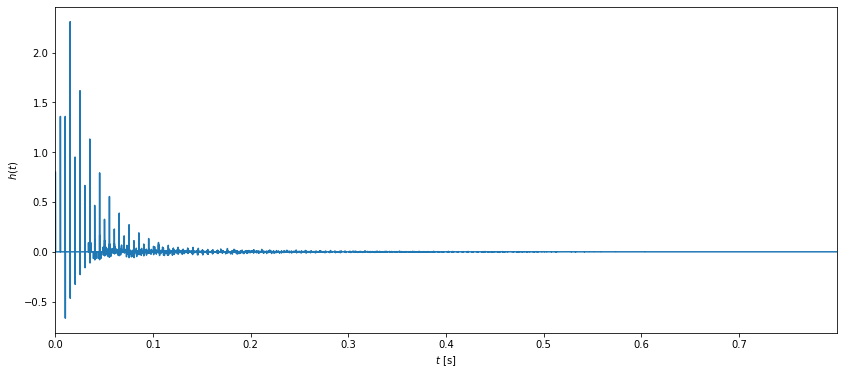

In [81]:
mixingParams = np.array([0.3, 0.25, 0.25, 0,20])
plainDelays = np.array([1553, 1613, 1493, 1153])
allpassDelays = np.array([223, 443])
apParams = np.array([-0.7, -0.7])
reverbTime = 0.8 # seconds
plainGains = plainGainFromReverbTime(reverbTime, plainDelays, samplingFreq)
# compute the impulse response of the room
irLength = np.int(np.floor(reverbTime*samplingFreq))
impulse = np.r_[np.array([1]),np.zeros(irLength-1)]
impulseResponse = guitarSignalWithReverb = \
    shroederReverb(impulse, mixingParams, plainDelays, plainGains, allpassDelays, apParams)
plt.figure(figsize=(14,6))
plt.plot(np.arange(irLength)/samplingFreq, impulseResponse)
plt.xlabel('$t$ [s]'),plt.ylabel('$h(t)$'),plt.xlim((0,(irLength-1)/samplingFreq));

### Moorer's Reverb

Text about moorer



In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
import IPython.display as ipd

def plainReverberator(inputSignal, delay, filterParam):
    nData = np.size(inputSignal)
    outputSignal = np.zeros(nData)
    for n in np.arange(nData):
        if n < delay:
            outputSignal[n] = inputSignal[n]
        else:
            outputSignal[n] = (delay-filterParam)*inputSignal[n-delay] + filterParam*outputSignal[n-delay]
    return outputSignal



In [83]:
def plainGainFromReverbTime(reverbTime, plainDelay, samplingFreq):
    nDelays = np.size(plainDelay)
    plainGains = np.zeros(nDelays)
    for ii in np.arange(nDelays):
        plainGains[ii] = 10**(-3*plainDelays[ii]/(reverbTime*samplingFreq))
    return plainGains

In [84]:
def allpassReverberator(inputSignal, delay, apParameter):
    nData = np.size(inputSignal)
    outputSignal = np.zeros(nData)
    for n in np.arange(nData):
        if n < delay:
            outputSignal[n] = inputSignal[n]
        else:
            outputSignal[n] = apParameter*inputSignal[n] + inputSignal[n-delay] - \
                apParameter*outputSignal[n-delay]
    return outputSignal

In [85]:
def moorerReverb(inputSignal, mixingParams, plainDelays, plainGains, allpassDelays, apParams):
    nData = np.size(inputSignal)
    tmpSignal = np.zeros(nData)
    # run the plain reverberators in parallel
    nPlainReverberators = np.size(plainDelays)
    for ii in np.arange(nPlainReverberators):
        tmpSignal = tmpSignal + \
            mixingParams[ii]*plainReverberator(inputSignal, plainDelays[ii], plainGains[ii])
    # run the allpass reverberators in series
    nAllpassReverberators = np.size(allpassDelays)
    for ii in np.arange(nAllpassReverberators):
        tmpSignal = allpassReverberator(tmpSignal, allpassDelays[ii], apParams[ii])
    return tmpSignal

In [86]:
samplingFreq, guitarSignal = wave.read('data/guitar.wav')
guitarSignal = guitarSignal/2**15 # normalise
ipd.Audio(guitarSignal, rate=samplingFreq) 

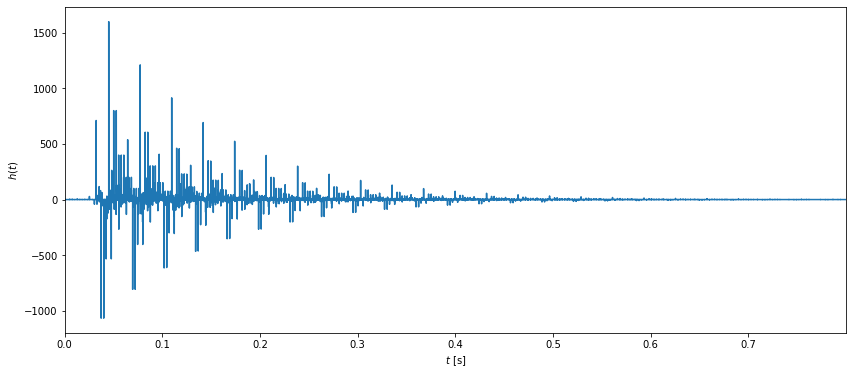

In [96]:
mixingParams = np.array([0.3, 0.2, 0.1, 0,2, 0.1, 0,1])
plainDelays = np.array([1557, 1617, 1491, 1356, 1422, 1116])
allpassDelays = np.array([225, 341])
apParams = np.array([-0.5, -0.5])
reverbTime = 0.8 # seconds
plainGains = plainGainFromReverbTime(reverbTime, plainDelays, samplingFreq)
# compute the impulse response of the room
irLength = np.int(np.floor(reverbTime*samplingFreq))
impulse = np.r_[np.array([1]),np.zeros(irLength-1)]
impulseResponse = guitarSignalWithReverb = \
    moorerReverb(impulse, mixingParams, plainDelays, plainGains, allpassDelays, apParams)
plt.figure(figsize=(14,6))
plt.plot(np.arange(irLength)/samplingFreq, impulseResponse)
plt.xlabel('$t$ [s]'),plt.ylabel('$h(t)$'),plt.xlim((0,(irLength-1)/samplingFreq));

In [88]:
guitarSignalWithReverb = \
    moorerReverb(guitarSignal, mixingParams, plainDelays, plainGains, allpassDelays, apParams)
ipd.Audio(guitarSignalWithReverb, rate=samplingFreq)

### Freeverb

Text about freeverb



In [89]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
import IPython.display as ipd

def plainReverberator(inputSignal, delay, filterParam):
    nData = np.size(inputSignal)
    outputSignal = np.zeros(nData)
    for n in np.arange(nData):
        if n < delay:
            outputSignal[n] = inputSignal[n]
        else:
            outputSignal[n] = (delay-filterParam)*inputSignal[n-delay] + filterParam*outputSignal[n-delay]
    return outputSignal



In [90]:
def plainGainFromReverbTime(reverbTime, plainDelay, samplingFreq):
    nDelays = np.size(plainDelay)
    plainGains = np.zeros(nDelays)
    for ii in np.arange(nDelays):
        plainGains[ii] = 10**(-3*plainDelays[ii]/(reverbTime*samplingFreq))
    return plainGains

In [91]:
def allpassReverberator(inputSignal, delay, apParameter):
    nData = np.size(inputSignal)
    outputSignal = np.zeros(nData)
    for n in np.arange(nData):
        if n < delay:
            outputSignal[n] = inputSignal[n]
        else:
            outputSignal[n] = apParameter*inputSignal[n] + inputSignal[n-delay] - \
                apParameter*outputSignal[n-delay]
    return outputSignal

In [92]:
def freeReverb(inputSignal, mixingParams, plainDelays, plainGains, allpassDelays, apParams):
    nData = np.size(inputSignal)
    tmpSignal = np.zeros(nData)
    # run the plain reverberators in parallel
    nPlainReverberators = np.size(plainDelays)
    for ii in np.arange(nPlainReverberators):
        tmpSignal = tmpSignal + \
            mixingParams[ii]*plainReverberator(inputSignal, plainDelays[ii], plainGains[ii])
    # run the allpass reverberators in series
    nAllpassReverberators = np.size(allpassDelays)
    for ii in np.arange(nAllpassReverberators):
        tmpSignal = allpassReverberator(tmpSignal, allpassDelays[ii], apParams[ii])
    return tmpSignal

In [93]:
samplingFreq, guitarSignal = wave.read('data/guitar.wav')
guitarSignal = guitarSignal/2**15 # normalise
ipd.Audio(guitarSignal, rate=samplingFreq) 

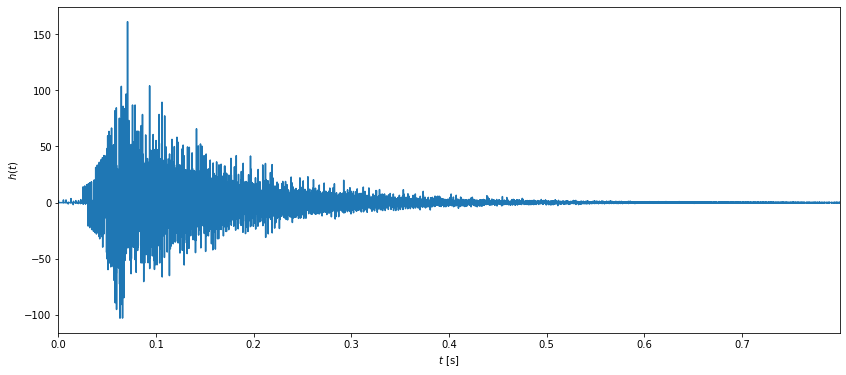

In [94]:
mixingParams = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])
plainDelays = np.array([1557, 1617, 1491, 1422, 1277, 1356, 1188, 1116])
allpassDelays = np.array([225, 556, 441, 341])
apParams = np.array([-0.5, -0.5, -0.5, -0.5])
reverbTime = 0.8 # seconds
plainGains = plainGainFromReverbTime(reverbTime, plainDelays, samplingFreq)
# compute the impulse response of the room
irLength = np.int(np.floor(reverbTime*samplingFreq))
impulse = np.r_[np.array([1]),np.zeros(irLength-1)]
impulseResponse = guitarSignalWithReverb = \
    freeReverb(impulse, mixingParams, plainDelays, plainGains, allpassDelays, apParams)
plt.figure(figsize=(14,6))
plt.plot(np.arange(irLength)/samplingFreq, impulseResponse)
plt.xlabel('$t$ [s]'),plt.ylabel('$h(t)$'),plt.xlim((0,(irLength-1)/samplingFreq));

In [95]:
guitarSignalWithReverb = \
    freeReverb(guitarSignal, mixingParams, plainDelays, plainGains, allpassDelays, apParams)
ipd.Audio(guitarSignalWithReverb, rate=samplingFreq)